In [1]:
from bs4 import BeautifulSoup  
import pandas as pd
import requests

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

source = requests.get(url)  
soup = BeautifulSoup(source.text, 'lxml')


for t in soup.select('td:has(span[title])'):
    if t.span.span.get('title') == 'Increase':
        t.replace_with(BeautifulSoup(f'<td>{t.get_text(strip=True)}</td>','lxml'))
    else:
        t.replace_with(BeautifulSoup(f'<td>-{t.get_text(strip=True)}</td>','lxml'))


In [2]:
df = pd.read_html(str(soup))[1]
df.head(5)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4%,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8%,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8%,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7%,400000,"Minnetonka, Minnesota"


In [3]:
df.rename(columns={'Headquarters':'headquarters(city)'}, inplace=True)
df.rename(columns= {'Revenue (USD millions)':'revenue_2023 (USD millions)'}, inplace=True)
df.columns = df.columns.str.lower()
df.head(5)

,rank,name,industry,revenue_2023 (usd millions),revenue growth,employees,headquarters(city)
0,1,Walmart,Retail,611289,6.7%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4%,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8%,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8%,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7%,400000,"Minnetonka, Minnesota"


In [4]:
df['revenue growth'] = df['revenue growth'].str.strip('%').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         100 non-null    int64  
 1   name                         100 non-null    object 
 2   industry                     100 non-null    object 
 3   revenue_2023 (usd millions)  100 non-null    int64  
 4   revenue growth               100 non-null    float64
 5   employees                    100 non-null    int64  
 6   headquarters(city)           100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [5]:
df[df['headquarters(city)'].str.count(',')>1]

,rank,name,industry,revenue_2023 (usd millions),revenue growth,employees,headquarters(city)
85,86,Allstate,Insurance,51412,-3.4,54250,"Northfield Township, Cook County, Illinois"


In [6]:
df.loc[df['headquarters(city)'].str.count(',')>1, 'headquarters(city)'] = 'Cook County, Illinois'
df.loc[df['headquarters(city)'].str.contains('Cook')]
split = df['headquarters(city)'].str.split(', ')
df['headquarters(city)'] = split.str[0]
df['headquarters(state)'] = split.str[1]
df.head(5)

,rank,name,industry,revenue_2023 (usd millions),revenue growth,employees,headquarters(city),headquarters(state)
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnetonka,Minnesota


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         100 non-null    int64  
 1   name                         100 non-null    object 
 2   industry                     100 non-null    object 
 3   revenue_2023 (usd millions)  100 non-null    int64  
 4   revenue growth               100 non-null    float64
 5   employees                    100 non-null    int64  
 6   headquarters(city)           100 non-null    object 
 7   headquarters(state)          100 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [8]:
df.insert(5, 'revenue_2022 (usd millions)', df['revenue_2023 (usd millions)']/(1 + (df['revenue growth']/100)))

df['revenue_2022 (usd millions)'] = df['revenue_2022 (usd millions)'].apply(lambda x: round(x))
df.head(5)

,rank,name,industry,revenue_2023 (usd millions),revenue growth,revenue_2022 (usd millions),employees,headquarters(city),headquarters(state)
0,1,Walmart,Retail,611289,6.7,572904,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983,9.4,469820,1540000,Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680,44.8,285691,62000,Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,365796,164000,Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,287633,400000,Minnetonka,Minnesota


In [10]:
path = r"C:\Users\USER\Desktop\LargestCompaniesInUSAbyReveneue.csv"
df.to_csv(path, index=False)

In [14]:
df['industry'].value_counts().sort_values(ascending=False).reset_index().nlargest(10, columns='count').rename(columns={'count':'no. of companies'})

,industry,no. of companies
0,Financials,11
1,Petroleum industry,10
2,Retail,10
3,Pharmaceutical industry,7
4,Healthcare,6
5,Insurance,5
6,Technology,5
7,Airline,3
8,Telecommunications,3
9,Technology and cloud computing,3


In [15]:
df['headquarters(state)'].value_counts().sort_values(ascending=False).reset_index().nlargest(10, columns='count').rename(columns={'count':'no. of companies'})

,headquarters(state),no. of companies
0,New York,15
1,Texas,13
2,California,10
3,Illinois,8
4,Ohio,6
5,Minnesota,4
6,Massachusetts,4
7,Virginia,4
8,New Jersey,4
9,Florida,3


In [34]:
top_10_industries_by_revenue = df.groupby('industry')['revenue_2023 (usd millions)'].sum().sort_values(ascending=False)\
    .reset_index().nlargest(n=10, columns='revenue_2023 (usd millions)')

top_10_industries_by_revenue

,industry,revenue_2023 (usd millions)
0,Retail,1578909
1,Petroleum industry,1521225
2,Healthcare,1189368
3,Financials,927262
4,Pharmaceutical industry,730059
5,Technology and cloud computing,541636
6,Retail and cloud computing,513983
7,Conglomerate,445718
8,Electronics industry,394328
9,Technology,389147


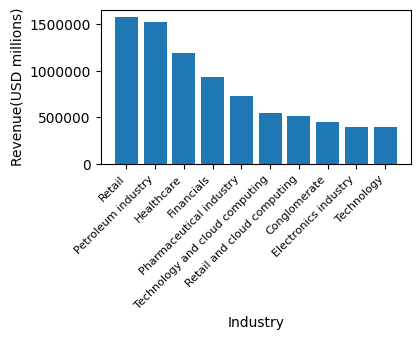

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
plt.bar(data=top_10_industries_by_revenue, height='revenue_2023 (usd millions)', x='industry')
plt.xlabel('Industry')
plt.ylabel('Revenue(USD millions)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [27]:
emerging_industries = df[df['revenue growth'] > 20]

industry_stats = emerging_industries.groupby('industry').agg(
    average_revenue_usd_millions=('revenue_2023 (usd millions)', lambda x: round(x.mean())),
    average_growth=('revenue growth', lambda x: round(x.mean(), 2)),
    count=('name', 'count'))

industry_stats = industry_stats.sort_values(by='average_growth', ascending=False)

industry_stats

,average_revenue_usd_millions,average_growth,count
industry,,,
Infotech,62344,97.20,1
Petroleum industry and logistics,59043,88.40,1
Airline,48169,71.87,3
Food processing,47194,61.60,1
Automotive and energy,81462,51.40,1
Petroleum industry,152122,48.89,10
Financials,92221,34.03,4
Food service,68636,33.80,1
Technology,44200,31.70,1


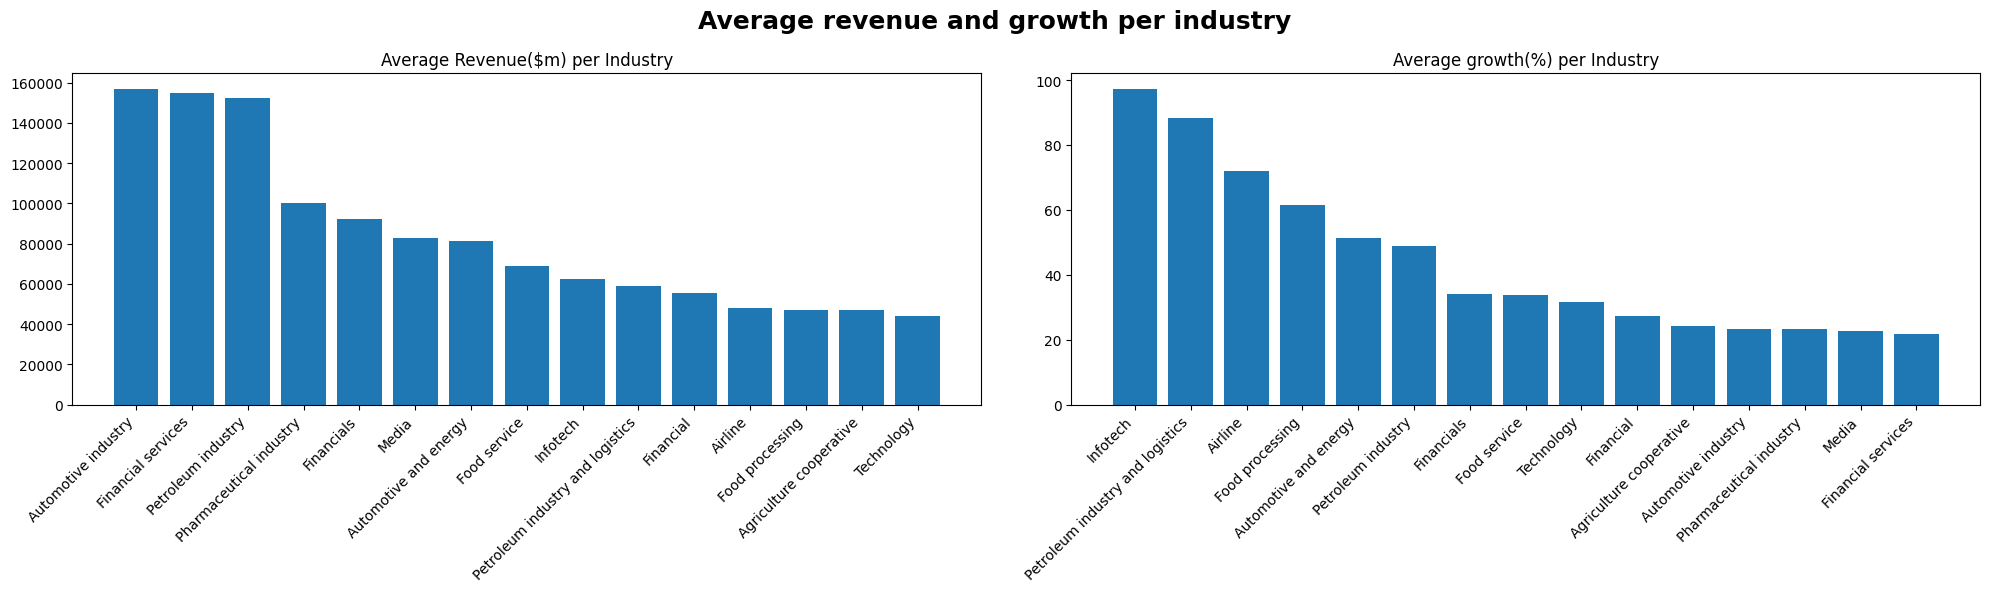

In [113]:
industry_stats_sorted = industry_stats.sort_values(by='average_revenue_usd_millions', ascending=False)

fig, axs = plt.subplots(1,2, figsize=(20,6))

fig.suptitle('Average revenue and growth per industry', fontsize=18, fontweight='bold')
axs[0].bar(x=industry_stats_sorted.index,height=industry_stats_sorted['average_revenue_usd_millions'])
axs[0].set_xticks(industry_stats_sorted.index.to_list())
axs[0].set_xticklabels(industry_stats_sorted.index.to_list(), rotation=45, ha='right')
axs[0].set_title('Average Revenue($m) per Industry')

axs[1].bar(x=industry_stats.index, height=industry_stats['average_growth'])
axs[1].set_xticks(industry_stats.index.to_list())
axs[1].set_xticklabels(industry_stats.index.to_list(), rotation=45, ha='right')
axs[1].set_title('Average growth(%) per Industry')
plt.tight_layout()
plt.show()


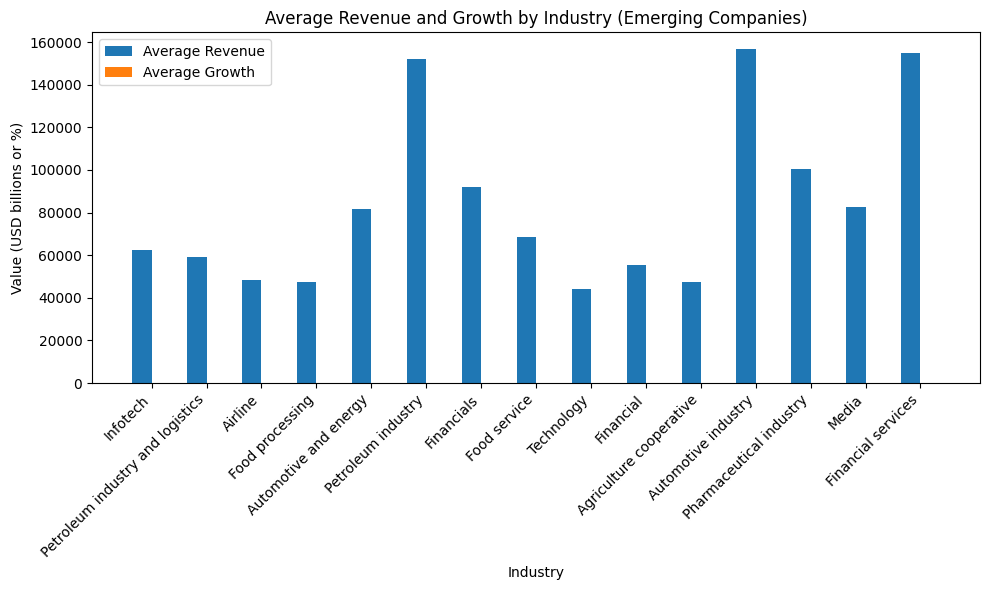

In [49]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Extract data for plotting
industry_names = industry_stats.index.to_list()
average_revenue = industry_stats["average_revenue_usd_millions"].to_list()
average_growth = industry_stats["average_growth"].to_list()

# Create the bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(industry_names))

plt.bar(index, average_revenue, bar_width, label='Average Revenue')
plt.bar([i + bar_width for i in index], average_growth, bar_width, label='Average Growth')

plt.xlabel('Industry')
plt.ylabel('Value (USD billions or %)')
plt.title('Average Revenue and Growth by Industry (Emerging Companies)')
plt.xticks([i + bar_width/2 for i in index], industry_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [101]:
industry_stats.sort_values(by='average_revenue_usd_millions', ascending=False)

,average_revenue_usd_millions,average_growth,count
industry,,,
Automotive industry,156735,23.40,1
Financial services,154792,21.70,1
Petroleum industry,152122,48.89,10
Pharmaceutical industry,100330,23.40,1
Financials,92221,34.03,4
Media,82722,22.70,1
Automotive and energy,81462,51.40,1
Food service,68636,33.80,1
Infotech,62344,97.20,1
